<a href="https://colab.research.google.com/github/NouraAltuwiam/IT326-Stroke-Prediction/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import and reading data**

### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

### Reading Data

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Data Analysis**



### five number summary

In [3]:
print("\nStatistical summaries (Numerical Attributes):")
print(df.describe())


Statistical summaries (Numerical Attributes):
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.00000

#### Five Number Summary Explanation:
The five number summary provides an overview of the numerical attributes in the dataset, showing important statistical measures for understanding data spread and distribution.  

- Age: The age values range from young to elderly patients, with a median around middle age, indicating a balanced dataset across age groups.  
- Average Glucose Level: The values vary widely, with some very high glucose levels, suggesting variability in patients’ health conditions.  
- BMI: The BMI column has fewer records (4909 instead of 5110), confirming the presence of missing data.

### detect outlier and boxplot


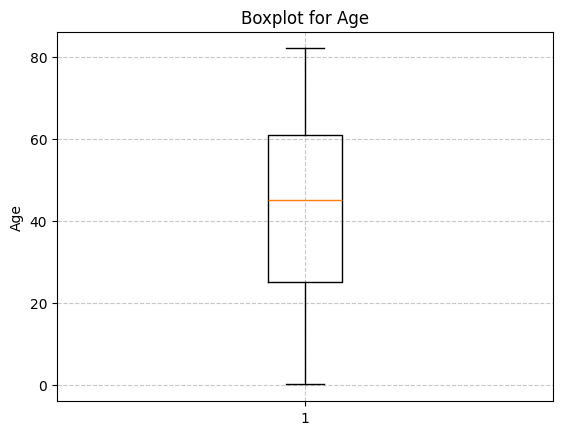

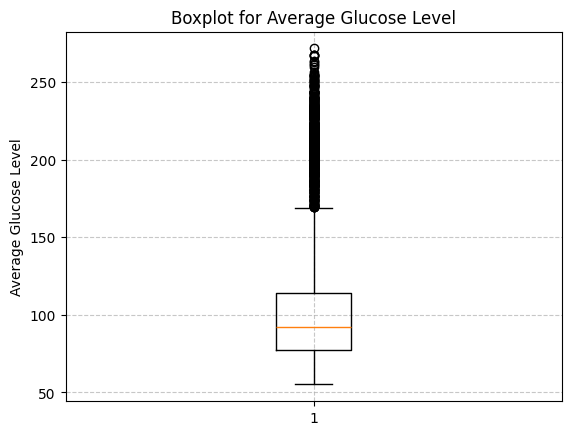

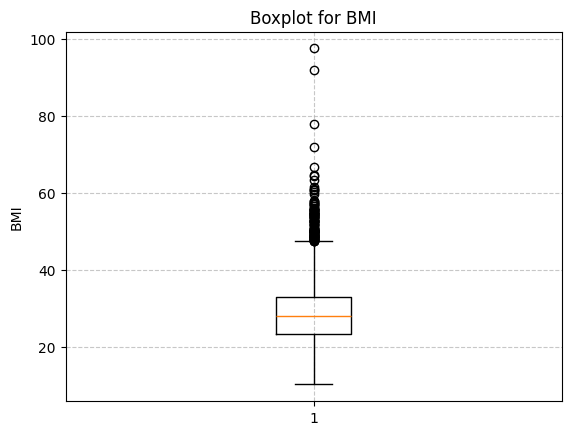

In [4]:
plt.boxplot(df['age'])
plt.title('Boxplot for Age')
plt.ylabel('Age')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.boxplot(df['avg_glucose_level'])
plt.title('Boxplot for Average Glucose Level')
plt.ylabel('Average Glucose Level')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.boxplot(df['bmi'].dropna())
plt.title('Boxplot for BMI')
plt.ylabel('BMI')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### Boxplot Explanation:
The boxplots visualize the distribution and outliers for numerical features.  

- Age: The distribution is balanced between young and old patients, with no extreme outliers.  
- Average Glucose Level: There are several outliers above 200, indicating that some patients have unusually high glucose levels.  
- BMI: The BMI attribute shows multiple outliers above 50, which may represent data entry errors or exceptional cases.  

These outliers suggest that the dataset may require preprocessing to remove or adjust extreme values before modeling.  

### missing values


Missing values per column
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


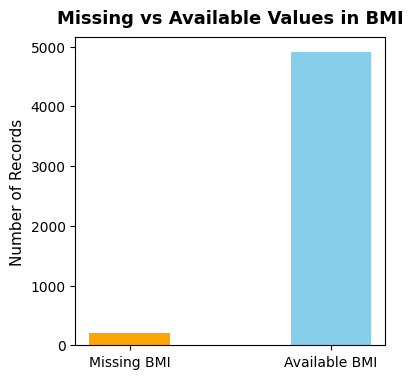

()

In [5]:
num_of_missing_values= df.isnull().sum()
print("\nMissing values per column")
print(num_of_missing_values)
missing_bmi = df['bmi'].isnull().sum()
filled = len(df) - missing_bmi

data = {'Missing BMI': missing_bmi, 'Available BMI': filled}


plt.figure(figsize=(4,4))
plt.bar(data.keys(), data.values(), color=['orange', 'skyblue'], width=0.4)
plt.title('Missing vs Available Values in BMI', fontsize=13, fontweight='bold', pad=10)
plt.ylabel('Number of Records', fontsize=11)
plt.show()
()

 Missing Values Explanation:
The chart compares the missing and available values in the *BMI* column.  

- Observation: All attributes are complete except for *BMI*, which contains a small number of missing records.  
- Insight: Most records have valid BMI data, while a few are missing. This pattern shows that only one numerical feature is incomplete.  

This visualization confirmed that BMI requires missing-value handling (such as imputation) during preprocessing to ensure consistent data quality.  


### Plots

###### plot 1: scatterPlot (Age vs. BMI by Stroke)

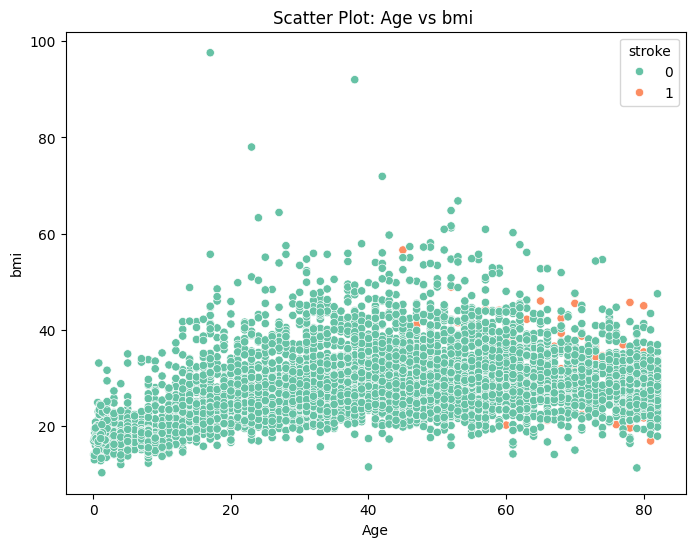

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(  x='age', y='bmi', data=df , hue='stroke',  palette='Set2')
plt.title("Scatter Plot: Age vs bmi ")
plt.xlabel("Age")
plt.ylabel("bmi")
plt.show()


Scatter Plot Explanation:
 - Stroke cases (1) appear more frequently among older ages.
 - BMI values are spread out with some very high outliers.
 - Most data points are concentrated between BMI 20–40 across different ages.

The plot shows that age is related to stroke occurrence, and BMI contains outliers that need preprocessing.

###### plot 2: Histograms (Age, BMI, and Average Glucose Level)


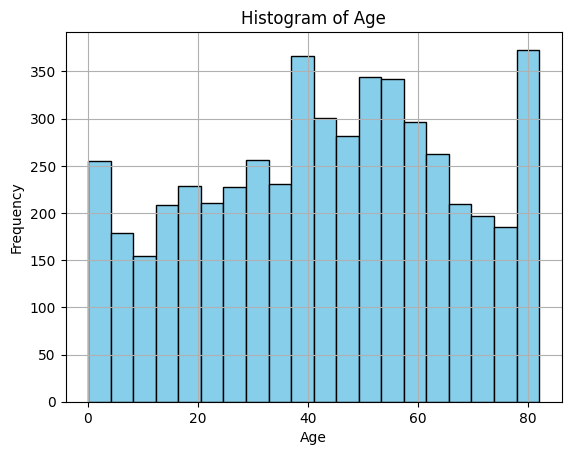

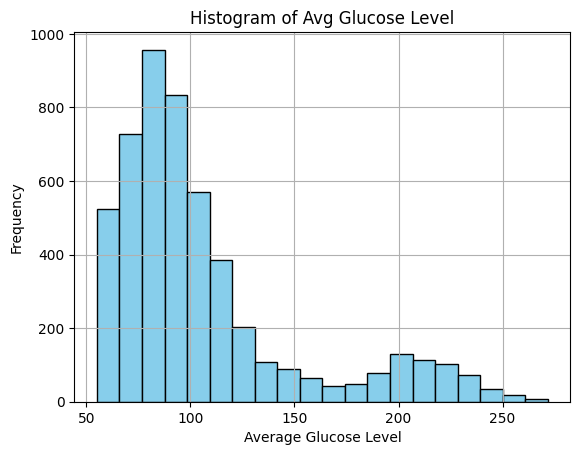

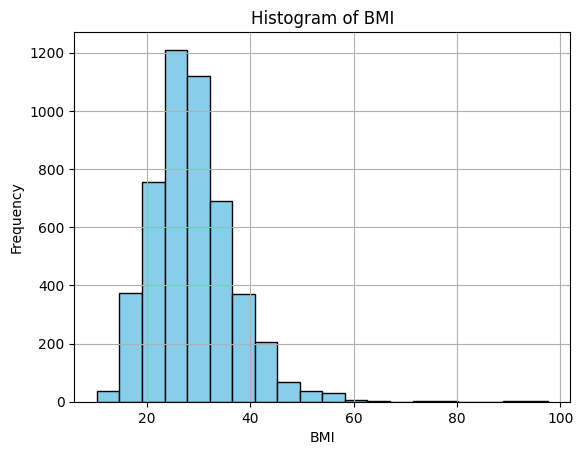

In [7]:
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

df['avg_glucose_level'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Frequency")
plt.show()

df['bmi'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

Histogram Explanation:
 - Age: Most patients are adults, fewer young cases.
 - BMI: Some missing values.
 - Glucose: Skewed with high outliers.

The plots reveal missing values, skewness, and outliers that require preprocessing.

###### plot 3: Bar Plots (Gender, Residence Type, Work Type, Smoking Status, Ever Married)

/tmp/ipython-input-2725022515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette="Set2", edgecolor="black")


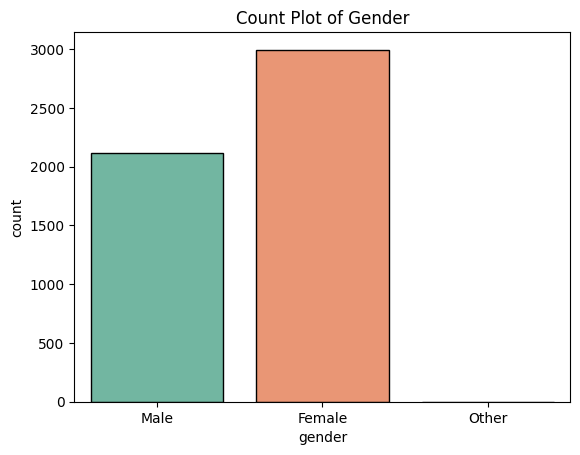

/tmp/ipython-input-2725022515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=df, palette="Set2", edgecolor="black")


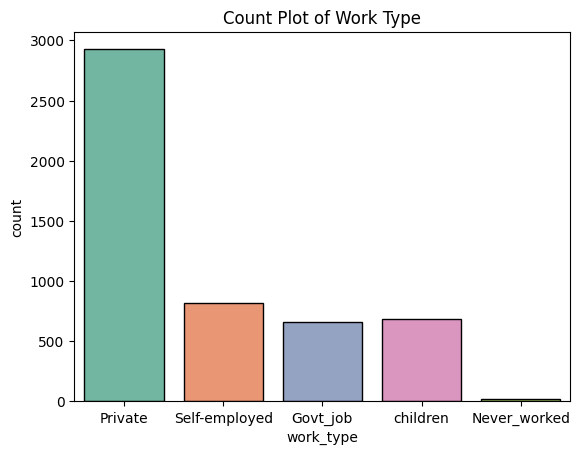

/tmp/ipython-input-2725022515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=df, palette="Set2", edgecolor="black")


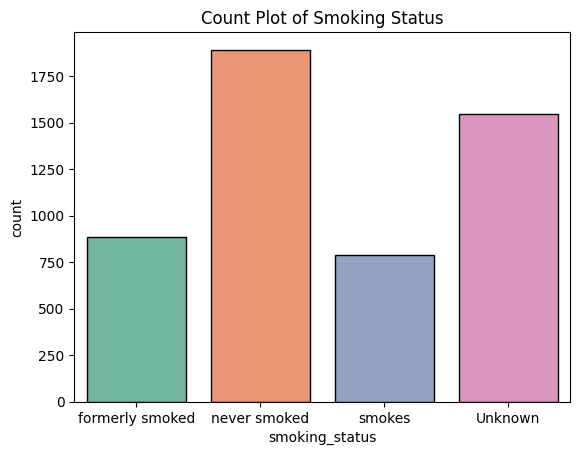

/tmp/ipython-input-2725022515.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Residence_type', data=df, palette="Set2", edgecolor="black")


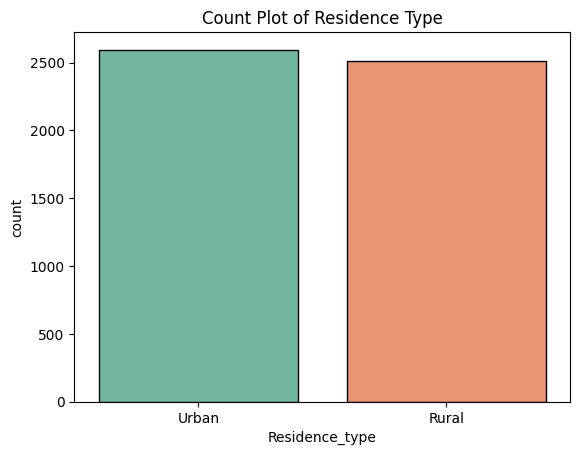

/tmp/ipython-input-2725022515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=df, palette="Set2", edgecolor="black")


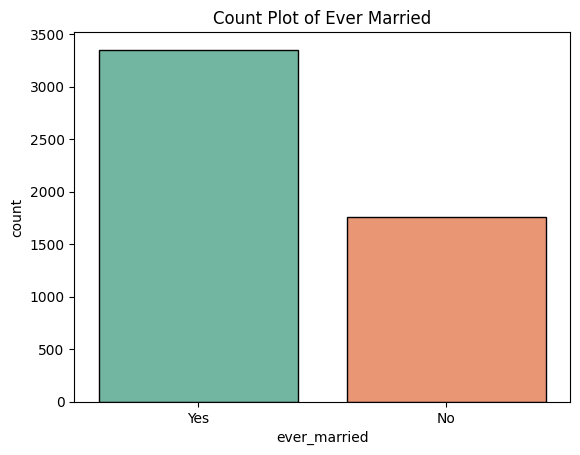

In [8]:
sns.countplot(x='gender', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Gender")
plt.show()

sns.countplot(x='work_type', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Work Type")
plt.show()

sns.countplot(x='smoking_status', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Smoking Status")
plt.show()

sns.countplot(x='Residence_type', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Residence Type")
plt.show()

sns.countplot(x='ever_married', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Ever Married")
plt.show()

Bar Plot Explanation:
 - Gender: more female than males.
 - Residence: Urban and rural similar.
 - Work Type: Private is dominant.
 - Smoking: Includes “Unknown.”
 - Married: Majority are married.

The plots reveal categorical imbalance and missing/unknown values that need preprocessing.

###### Class Label Distribution (Stroke) – Pie Chart

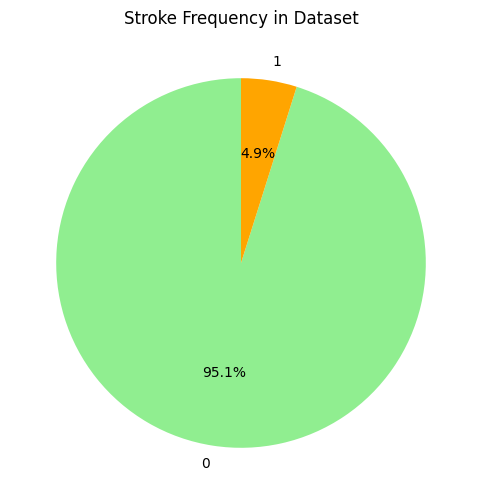

In [9]:
stroke_freq = df['stroke'].value_counts(normalize=True) * 100

stroke_freq.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90,
                     colors=['lightgreen','orange'])

plt.title('Stroke Frequency in Dataset')
plt.ylabel('')
plt.show()

Class Label Explanation:
 - No Stroke (0): Majority.
 - Stroke (1): Very few.

 The plot shows severe class imbalance that must be addressed in preprocessing.

# **Data Preprocessing**

####Data Bafore Preprocessing

In [10]:
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Preprocessing Techniques

####Handling missing values

**Checking for missing values:**

In [11]:
missing_values = df.isnull().sum()

print("Missing values in each attribute:\n")
print(missing_values)


Missing values in each attribute:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We found 201 missing values in the BMI, which negatively affect the data mining process.


**Handling missing values:**

Data *before* handling missing value

In [12]:
df[['bmi']].head(15)

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
5,29.0
6,27.4
7,22.8
8,NaN
9,24.2


In [13]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)


/tmp/ipython-input-2494381813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(mean_bmi, inplace=True)


Data *after* handling missing value

In [14]:
df[['bmi']].head(15)

,bmi
0,36.600000
1,28.893237
2,32.500000
3,34.400000
4,24.000000
5,29.000000
6,27.400000
7,22.800000
8,28.893237
9,24.200000


####**Noise removal**

Data before removing the outliers:

In [15]:
df[['bmi','avg_glucose_level']].head(15)

,bmi,avg_glucose_level
0,36.600000,228.69
1,28.893237,202.21
2,32.500000,105.92
3,34.400000,171.23
4,24.000000,174.12
5,29.000000,186.21
6,27.400000,70.09
7,22.800000,94.39
8,28.893237,76.15
9,24.200000,58.57


**Handling Noies**

In [16]:

Q1 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['age', 'avg_glucose_level', 'bmi']] < (Q1 - 1.5 * IQR)) |
          (df[['age', 'avg_glucose_level', 'bmi']] > (Q3 + 1.5 * IQR))).any(axis=1)]


Data After Noies Handling

In [17]:
df[['bmi','avg_glucose_level']].head(15)

,bmi,avg_glucose_level
2,32.500000,105.92
6,27.400000,70.09
7,22.800000,94.39
8,28.893237,76.15
9,24.200000,58.57
10,29.700000,80.43
11,36.800000,120.46
12,27.300000,104.51
15,30.900000,167.41
18,37.800000,89.22



In the 'Average Glucose Level' and 'bmi' columns, we noticed there was an outliers, meaning a person’s average glucose level and bmi were far from the rest of the values in the column. Outliers have a big impact on analysis and modeling because they can distort the results. we decided to use the code to find the outliers and delete them, the data became more accurate.

####**Encoding Categorical Data**

Data before the ُEncoding:

In [18]:
df[['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']].head(15)

,gender,work_type,Residence_type,smoking_status,ever_married
2,Male,Private,Rural,never smoked,Yes
6,Male,Private,Rural,never smoked,Yes
7,Female,Private,Urban,never smoked,No
8,Female,Private,Rural,Unknown,Yes
9,Female,Private,Urban,Unknown,Yes
10,Female,Private,Rural,never smoked,Yes
11,Female,Govt_job,Rural,smokes,Yes
12,Female,Private,Urban,smokes,Yes
15,Female,Self-employed,Rural,never smoked,Yes
18,Female,Private,Urban,never smoked,No


In [19]:

from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])



Data After Encoding

In [20]:
df[['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']].head(15)

,gender,work_type,Residence_type,smoking_status,ever_married
2,1,2,0,2,1
6,1,2,0,2,1
7,0,2,1,2,0
8,0,2,0,0,1
9,0,2,1,0,1
10,0,2,0,2,1
11,0,0,0,3,1
12,0,2,1,3,1
15,0,3,0,2,1
18,0,2,1,2,0


 we had categorical data in columns like ‘gender’, ‘work_type’, ‘Residence_type’, ‘smoking_status’, and ‘ever_married’, all containing text values (like ‘Male’ or ‘Female’ or ‘Married’). The problem is that statistical models can’t use text directly; the data needs to be numerical. So, I used LabelEncoder to convert the text values into numbers. After applying the code, the data became numeric and ready for use in models.

####**Discretization**

Data Before Discretization

In [21]:
df[['age', 'bmi', 'avg_glucose_level']].head(15)

,age,bmi,avg_glucose_level
2,80.0,32.500000,105.92
6,74.0,27.400000,70.09
7,69.0,22.800000,94.39
8,59.0,28.893237,76.15
9,78.0,24.200000,58.57
10,81.0,29.700000,80.43
11,61.0,36.800000,120.46
12,54.0,27.300000,104.51
15,50.0,30.900000,167.41
18,60.0,37.800000,89.22


In [22]:

df['age'] = pd.cut(df['age'],
                   bins=[0, 30, 50, 100],
                   labels=['Young', 'Middle-aged', 'Senior'])

df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'],
                                 bins=[0, 100, 140, 300],
                                 labels=['Low', 'Normal', 'High'])

df['bmi'] = pd.cut(df['bmi'],
                   bins=[0, 18.5, 25, 30, 100],
                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


Data After Discretization

In [23]:
df[[ 'age', 'avg_glucose_level', 'bmi']].head(15)


,age,avg_glucose_level,bmi
2,Senior,Normal,Obese
6,Senior,Low,Overweight
7,Senior,Low,Normal
8,Senior,Low,Overweight
9,Senior,Low,Normal
10,Senior,Low,Overweight
11,Senior,Normal,Obese
12,Senior,Normal,Overweight
15,Middle-aged,High,Obese
18,Senior,Low,Obese


We performed discretization on the dataset to improve the analysis and modeling results. Specifically, we transformed the following columns into categorical groups:

age → grouped into 'Young' (0–30), 'Middle-aged' (31–50), and 'Senior' (51–100).

avg_glucose_level → grouped into 'Low' (0–100), 'Normal' (101–140), and 'High' (141–300).

bmi → grouped into 'Underweight' (0–18.5), 'Normal' (18.6–25), 'Overweight' (25.1–30), and 'Obese' (30.1–100).

This process replaced the original numeric values with their corresponding categorical labels, helping to reduce noise and improve the performance and interpretability of our data mining models.

####**Remove irrelevant column (id)**

In [24]:
if 'id' in df.columns:
  df.drop('id', axis=1, inplace=True)
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,Senior,0,1,1,2,0,Normal,Obese,2,1
6,1,Senior,1,1,1,2,0,Low,Overweight,2,1
7,0,Senior,0,0,0,2,1,Low,Normal,2,1
8,0,Senior,0,0,1,2,0,Low,Overweight,0,1
9,0,Senior,0,0,1,2,1,Low,Normal,0,1
10,0,Senior,1,0,1,2,0,Low,Overweight,2,1
11,0,Senior,0,1,1,0,0,Normal,Obese,3,1
12,0,Senior,0,0,1,2,1,Normal,Overweight,3,1
15,0,Middle-aged,1,0,1,3,0,High,Obese,2,1
18,0,Senior,0,0,0,2,1,Low,Obese,2,1


The ID column was used only to uniquely identify each record in the dataset. It doesn’t carry any predictive or analytical meaning related to stroke occurrence.
We removed it to prevent unnecessary noise and to make sure only relevant features are used during analysis and modeling.

####Splitting Dataset

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3512, 10), (879, 10))

We split the dataset into training and testing sets to evaluate how well the model performs on unseen data.
 we used an 80/20 split where 80% of the data is for training and 20% for testing.

####Data After Preprocessing

In [26]:
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,Senior,0,1,1,2,0,Normal,Obese,2,1
6,1,Senior,1,1,1,2,0,Low,Overweight,2,1
7,0,Senior,0,0,0,2,1,Low,Normal,2,1
8,0,Senior,0,0,1,2,0,Low,Overweight,0,1
9,0,Senior,0,0,1,2,1,Low,Normal,0,1
10,0,Senior,1,0,1,2,0,Low,Overweight,2,1
11,0,Senior,0,1,1,0,0,Normal,Obese,3,1
12,0,Senior,0,0,1,2,1,Normal,Overweight,3,1
15,0,Middle-aged,1,0,1,3,0,High,Obese,2,1
18,0,Senior,0,0,0,2,1,Low,Obese,2,1


# **Saving data**

In [27]:
df.to_csv("processed_data.csv" , index=False)